Here is an report for the dataset "studentSurvey" where I examined specific data labeled Area1 through Area12 to determine 
the following:

~Whether this data is suitable for factor analysis
~The appropriate number of factors for this data
~The best model fit for this data
~How the items group together into factors, if there is more than one factor indicated
~Whether the scale is considered reliable through inter-rater reliability and
~Whether the scale is considered reliable through inter-item reliability.

Loaded Libraies

In [1]:
library("corpcor")
library("GPArotation")
library("psych")
library("IDPmisc")

Load Data

In [4]:
studentSurvey = read.csv('C:/Users/Hanna Bohannon/Documents/DS0103 Notes and Assignments/DS0103_data/studentSurvey.csv')

Inspect Data

In [5]:
head(studentSurvey)

,Timestamp,Gender,Faculty,Engineering.Program,Law.Program,Business.Program,Arts.Program,Other.Program,Bachelor..Academic.Year.in.EU,Masters.Academic.Year.in.EU,...,Q3,Q4,Q5,Q6..What.are.the.best.aspects.of.the.program..,Q7..In.your.opinion.the.best.aspect.of.the.program.is,Q8..In.your.opinion.the.next.best.aspect.of.the.program.is,What.aspects.of.the.program.could.be.improved.,Do.you.feel.that.the.quality.of.education.improved.at.EU.over.the.last.year.,Do.you.feel.that.the.image.of.the.University.improved.over.the.last.year.,Username
,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,1/25/2016 14:37,Male,Arts,NA,,,B.A. in English,NA,3rd Year,,...,4,4,5,5,Teaching/Learning,Teaching/Learning,Teaching/Learning,Yes,Yes,NA
2,1/25/2016 14:38,Female,Arts,NA,,,B.A. in English,NA,4th Year,,...,4,4,5,5,Faculty,Faculty,Teaching/Learning,Yes,Yes,NA
3,1/25/2016 14:40,Male,Arts,NA,,,B.A. in English,NA,3rd Year,,...,4,4,5,3,Teaching/Learning,Teaching/Learning,Faculty,Yes,Yes,NA
4,1/25/2016 14:43,Male,Arts,NA,,,B.A. in English,NA,3rd Year,,...,4,3,4,5,Teaching/Learning,Teaching/Learning,Teaching/Learning,Yes,Yes,NA
5,1/25/2016 14:45,Female,Arts,NA,,,B.A. in English,NA,4th Year,,...,4,4,3,2,Teaching/Learning,Faculty,Overall learning environment,Yes,Yes,NA
6,1/25/2016 14:47,Female,Arts,NA,,,B.A. in English,NA,4th Year,,...,3,4,5,5,Faculty,Overall learning environment,Faculty,Yes,Yes,NA


Subset Data

In [7]:
studentSurvey <- studentSurvey[, 31:42]

Remove Na

In [9]:
studentSurvey2 = NaRV.omit(studentSurvey)

Create a Correlation Matrix

In [10]:
studentSurveymatrix = cor(studentSurvey2)

In [11]:
View(round(studentSurvey2, 2))

,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,5,5,5,5,5,5,5,5,5,5
2,4,5,4,4,4,5,4,5,4,4,5,5
3,4,5,5,5,5,5,5,5,4,5,5,5
4,5,5,5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,4,5,5,4,5,5,4,4
6,5,5,4,5,5,5,5,5,5,4,5,5
7,5,4,5,4,5,5,5,5,5,4,5,5
8,5,5,5,5,5,5,5,5,5,5,5,5
9,5,5,5,5,5,5,5,5,5,5,5,5


Bartlett's Test

In [12]:
cortest.bartlett(studentSurvey2)

R was not square, finding R from data



$chisq
[1] 2807.707

$p.value
[1] 0

$df
[1] 66

Check your Determinants

In [13]:
det(studentSurveymatrix)

[1] 0.002180645

Factor Analysis in R: 
Initial Pass to Determine Approximate Number of Factors

In [14]:
Model <- principal(studentSurvey1, nfactors = 12, rotate = "none")
Model

Principal Components Analysis
Call: principal(r = studentSurvey1, nfactors = 12, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12
Area1  0.71  0.38 -0.14  0.34 -0.22  0.00 -0.15  0.03 -0.14  0.34 -0.05 -0.10
Area2  0.76 -0.04 -0.08  0.13 -0.36  0.20 -0.04  0.27  0.21 -0.32 -0.07 -0.04
Area3  0.76  0.16 -0.13  0.06 -0.11 -0.40 -0.08 -0.28 -0.10 -0.28  0.08  0.12
Area4  0.71 -0.30 -0.29  0.24  0.24 -0.04  0.31  0.23 -0.24 -0.03  0.03  0.03
Area5  0.71 -0.43  0.01  0.27  0.13 -0.06 -0.13 -0.19  0.35  0.16 -0.05  0.09
Area6  0.78  0.09 -0.05 -0.29  0.04 -0.20  0.26 -0.05  0.13  0.06 -0.33 -0.22
Area7  0.77 -0.03  0.04 -0.32 -0.20 -0.16  0.08  0.22  0.11  0.21  0.32  0.12
Area8  0.68  0.36 -0.35 -0.21  0.33  0.27 -0.12 -0.02  0.11 -0.02  0.00  0.18
Area9  0.65  0.34  0.53  0.22  0.30 -0.04  0.08  0.11  0.08 -0.09  0.10 -0.05
Area10 0.75 -0.04  0.19 -0.02 -0.19  0.35  0.31 -0.35

Examine the Scree Plot

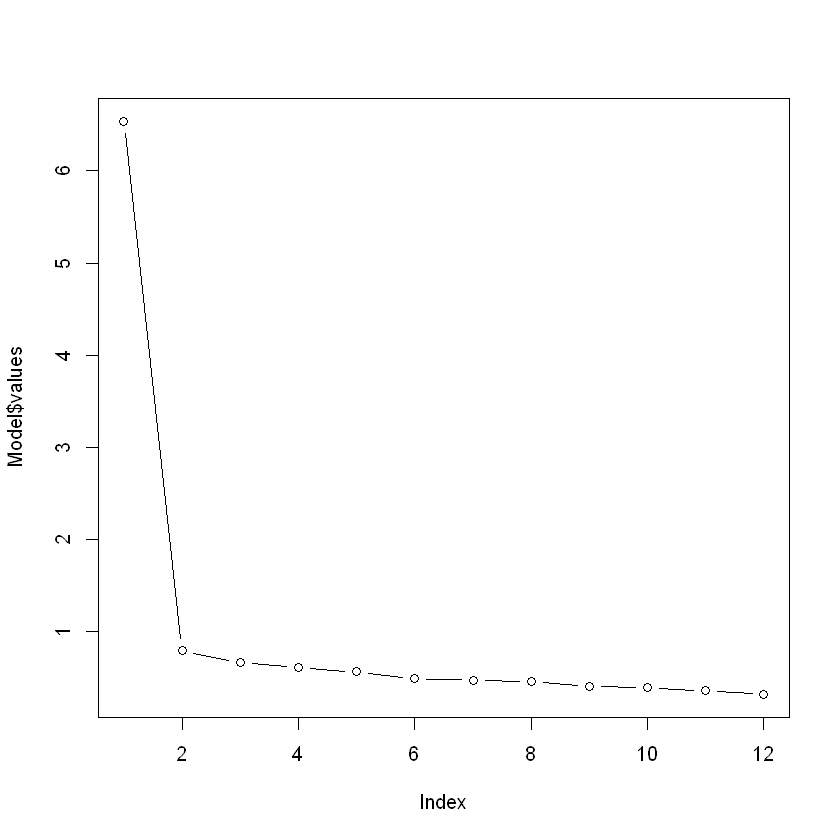

In [15]:
plot(Model$values, type="b")

What this graph shows is a clear break off where you can see that there is quite a jump down between 1 and 2, and another not-quite-so-large jump down between 2 and 3. The rest really seem to trail off after that. 
With this info, along with examining the eigenvalues, this tells me that there is only one factor.

Examining Residuals to Determine Model Fit

In [16]:
residuals <- factor.residuals(studentSurveymatrix, Model$loadings)

In [17]:
residuals <- as.matrix(residuals[upper.tri(residuals)])

In [18]:
largeResid <- abs(residuals) > .05

In [19]:
sum(largeResid)

[1] 0

In [20]:
sum(largeResid/nrow(residuals))

[1] 0

Oblique Rotation

In [21]:
Model2 <- principal(studentSurvey, nfactors = 2, rotate = "oblimin")
Model2

Principal Components Analysis
Call: principal(r = studentSurvey, nfactors = 2, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
         TC1   TC2   h2   u2 com
Area1  -0.03  0.82 0.65 0.35 1.0
Area2   0.49  0.34 0.58 0.42 1.8
Area3   0.26  0.58 0.61 0.39 1.4
Area4   0.77  0.00 0.59 0.41 1.0
Area5   0.93 -0.16 0.69 0.31 1.1
Area6   0.35  0.52 0.62 0.38 1.8
Area7   0.50  0.35 0.60 0.40 1.8
Area8  -0.03  0.79 0.60 0.40 1.0
Area9  -0.02  0.75 0.53 0.47 1.0
Area10  0.49  0.34 0.56 0.44 1.8
Area11  0.67  0.17 0.61 0.39 1.1
Area12  0.74  0.12 0.68 0.32 1.1

                       TC1  TC2
SS loadings           3.90 3.43
Proportion Var        0.33 0.29
Cumulative Var        0.33 0.61
Proportion Explained  0.53 0.47
Cumulative Proportion 0.53 1.00

 With component correlations of 
     TC1  TC2
TC1 1.00 0.65
TC2 0.65 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is

In [22]:
print.psych(Model2, cut = .3, sort=TRUE)

Principal Components Analysis
Call: principal(r = studentSurvey, nfactors = 2, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
       item   TC1   TC2   h2   u2 com
Area5     5  0.93       0.69 0.31 1.1
Area4     4  0.77       0.59 0.41 1.0
Area12   12  0.74       0.68 0.32 1.1
Area11   11  0.67       0.61 0.39 1.1
Area7     7  0.50  0.35 0.60 0.40 1.8
Area2     2  0.49  0.34 0.58 0.42 1.8
Area10   10  0.49  0.34 0.56 0.44 1.8
Area1     1        0.82 0.65 0.35 1.0
Area8     8        0.79 0.60 0.40 1.0
Area9     9        0.75 0.53 0.47 1.0
Area3     3        0.58 0.61 0.39 1.4
Area6     6  0.35  0.52 0.62 0.38 1.8

                       TC1  TC2
SS loadings           3.90 3.43
Proportion Var        0.33 0.29
Cumulative Var        0.33 0.61
Proportion Explained  0.53 0.47
Cumulative Proportion 0.53 1.00

 With component correlations of 
     TC1  TC2
TC1 1.00 0.65
TC2 0.65 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 components

Orthogonal Rotation

In [23]:
Model3 <- principal(studentSurvey, nfactors = 2, rotate = "varimax")
print.psych(Model3, cut=.3, sort=TRUE)

Principal Components Analysis
Call: principal(r = studentSurvey, nfactors = 2, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
       item  RC1  RC2   h2   u2 com
Area5     5 0.81      0.69 0.31 1.1
Area12   12 0.74 0.37 0.68 0.32 1.5
Area4     4 0.72      0.59 0.41 1.3
Area11   11 0.68 0.39 0.61 0.39 1.6
Area7     7 0.59 0.50 0.60 0.40 2.0
Area2     2 0.58 0.49 0.58 0.42 1.9
Area10   10 0.58 0.48 0.56 0.44 1.9
Area1     1      0.76 0.65 0.35 1.2
Area8     8      0.73 0.60 0.40 1.2
Area9     9      0.69 0.53 0.47 1.2
Area3     3 0.45 0.64 0.61 0.39 1.8
Area6     6 0.51 0.60 0.62 0.38 1.9

                       RC1  RC2
SS loadings           3.86 3.46
Proportion Var        0.32 0.29
Cumulative Var        0.32 0.61
Proportion Explained  0.53 0.47
Cumulative Proportion 0.53 1.00

Mean item complexity =  1.6
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with the empirical chi squar

Subsetting your Data

In [24]:
goodSS <- studentSurvey[, c(2, 3, 4, 5, 6, 7, 10)]
badSS <- studentSurvey[, c(1, 8, 9)]

Reverse Coding Items

In [25]:
studentSurvey$SS1_1r <- NA
studentSurvey$SS1_1r[studentSurvey1$SS1_3 == 1] <- 5
studentSurvey$SS1_1r[studentSurvey1$SS1_3 == 2] <- 4
studentSurvey$SS1_1r[studentSurvey1$SS1_3 == 3] <- 3
studentSurvey$SS1_1r[studentSurvey1$SS1_3 == 4] <- 2
studentSurvey$SS1_1r[studentSurvey1$SS1_3 == 5] <- 1



studentSurvey$SS1_8r <- NA
studentSurvey$SS1_8r[studentSurvey1$SS1_5 == 1] <- 6
studentSurvey$SS1_8r[studentSurvey1$SS1_5 == 2] <- 5
studentSurvey$SS1_8r[studentSurvey1$SS1_5 == 3] <- 4
studentSurvey$SS1_8r[studentSurvey1$SS1_5 == 4] <- 3
studentSurvey$SS1_8r[studentSurvey1$SS1_5 == 5] <- 2
studentSurvey$SS1_8r[studentSurvey1$SS1_5 == 6] <- 1

studentSurvey$SS1_9r <- NA
studentSurvey$SS1_9r[studentSurvey1$SS1_6 == 1] <- 5
studentSurvey$SS1_9r[studentSurvey1$SS1_6 == 2] <- 4
studentSurvey$SS1_9r[studentSurvey1$SS1_6 == 3] <- 3
studentSurvey$SS1_9r[studentSurvey1$SS1_6 == 4] <- 2
studentSurvey$SS1_9r[studentSurvey1$SS1_6 == 5] <- 1


studentSurvey$SS2_2r <- NA
studentSurvey$SS2_2r[studentSurvey1$SS2_1 == 1] <- 5
studentSurvey$SS2_2r[studentSurvey1$SS2_1 == 2] <- 4
studentSurvey$SS2_2r[studentSurvey1$SS2_1 == 3] <- 3
studentSurvey$SS2_2r[studentSurvey1$SS2_1 == 4] <- 2
studentSurvey$SS2_2r[studentSurvey1$SS2_1 == 5] <- 1

studentSurvey$SS2_3r <- NA
studentSurvey$SS2_3r[studentSurvey1$SS2_2 == 1] <- 5
studentSurvey$SS2_3r[studentSurvey1$SS2_2 == 2] <- 4
studentSurvey$SS2_3r[studentSurvey1$SS2_2 == 3] <- 3
studentSurvey$SS2_3r[studentSurvey1$SS2_2 == 4] <- 2
studentSurvey$SS2_3r[studentSurvey1$SS2_2 == 5] <- 1

studentSurvey$SS2_4r <- NA
studentSurvey$SS2_4r[studentSurvey1$SS2_4 == 1] <- 5
studentSurvey$SS2_4r[studentSurvey1$SS2_4 == 2] <- 4
studentSurvey$SS2_4r[studentSurvey1$SS2_4 == 3] <- 3
studentSurvey$SS2_4r[studentSurvey1$SS2_4 == 4] <- 2
studentSurvey$SS2_4r[studentSurvey1$SS2_4 == 5] <- 1

Dropping the Old (Non-Recoded) Items

In [26]:
studentSurvey <- studentSurvey[, c(1, 2, 3, 4, 8, 9)]

Calculating Reliability in R

In [27]:
alpha(goodSS)
alpha(badSS)
alpha(studentSurvey)


Reliability analysis   
Call: alpha(x = goodSS)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean   sd median_r
      0.88      0.88    0.87      0.52 7.7 0.0079  4.2 0.74     0.51

    95% confidence boundaries 
         lower alpha upper
Feldt     0.87  0.88   0.9
Duhachek  0.87  0.88   0.9

 Reliability if an item is dropped:
       raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
Area2       0.87      0.87    0.85      0.52 6.5   0.0093 0.0020  0.50
Area3       0.87      0.87    0.85      0.52 6.6   0.0092 0.0017  0.51
Area4       0.87      0.87    0.85      0.53 6.8   0.0089 0.0016  0.54
Area5       0.87      0.87    0.85      0.53 6.8   0.0089 0.0017  0.54
Area6       0.86      0.86    0.84      0.51 6.4   0.0095 0.0010  0.51
Area7       0.86      0.86    0.84      0.52 6.4   0.0094 0.0011  0.51
Area10      0.87      0.87    0.85      0.52 6.6   0.0092 0.0018  0.51

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
Area2  491  0.77  0.78  0.73


Reliability analysis   
Call: alpha(x = badSS)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.71      0.72    0.63      0.46 2.6 0.022  4.2 0.78     0.47

    95% confidence boundaries 
         lower alpha upper
Feldt     0.66  0.71  0.75
Duhachek  0.67  0.71  0.75

 Reliability if an item is dropped:
      raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
Area1      0.58      0.59    0.42      0.42 1.4    0.037    NA  0.42
Area8      0.63      0.64    0.47      0.47 1.8    0.032    NA  0.47
Area9      0.65      0.67    0.50      0.50 2.0    0.030    NA  0.50

 Item statistics 
        n raw.r std.r r.cor r.drop mean   sd
Area1 487  0.80  0.82  0.68   0.58  4.3 0.82
Area8 488  0.83  0.80  0.63   0.53  4.1 1.12
Area9 491  0.78  0.78  0.60   0.50  4.1 0.95

Non missing response frequency for each item
         1    2    3    4    5 miss
Area1 0.02 0.03 0.05 0.43 0.47 0.03
Area8 0.04 0.08 0.11 0.32 0.45 0.02
Area9 0.02 0.06 0.12 0.42 0.38 0.02


Reliability analysis   
Call: alpha(x = studentSurvey)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.84      0.84    0.82      0.47 5.4 0.011  4.2 0.73     0.47

    95% confidence boundaries 
         lower alpha upper
Feldt     0.82  0.84  0.86
Duhachek  0.82  0.84  0.86

 Reliability if an item is dropped:
      raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
Area1      0.81      0.81    0.77      0.46 4.2    0.014 0.0025  0.46
Area2      0.81      0.81    0.78      0.46 4.3    0.013 0.0029  0.46
Area3      0.80      0.81    0.77      0.46 4.2    0.014 0.0026  0.45
Area4      0.82      0.83    0.79      0.49 4.7    0.013 0.0025  0.48
Area8      0.82      0.82    0.79      0.48 4.6    0.013 0.0037  0.48
Area9      0.82      0.83    0.80      0.50 4.9    0.012 0.0018  0.50

 Item statistics 
        n raw.r std.r r.cor r.drop mean   sd
Area1 487  0.77  0.78  0.73   0.67  4.3 0.82
Area2 491  0.76  0.77  0.71   0.65  4.2 0.84
Area3 488  0

Draw Conclusions about Your Scale:

After examining the student survey as a whole and examining its subscales, 
my conclusion is that this is a very reliable survey! 

The data is suitable for factor analysis with the appropriate number of factors for this data being one(1). Chronbach's alpha is the best model fit for this data. As previously stated there is only one factor indicated and the scale is considered reliable through inter-rater reliability as well as through inter-item reliability.